<a href="https://colab.research.google.com/github/Anjusharma05/PRODIGY_DS_01/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = "/content/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"
df = pd.read_csv(file_path, skiprows=4)

In [ ]:
years = [str(y) for y in range(2000, 2023)]
columns_to_keep = ['Country Name'] + years
df_clean = df[columns_to_keep].dropna()


In [ ]:
exclusions = ['income', 'world', 'region']
df_clean = df_clean[~df_clean['Country Name'].str.lower().str.contains('|'.join(exclusions))]


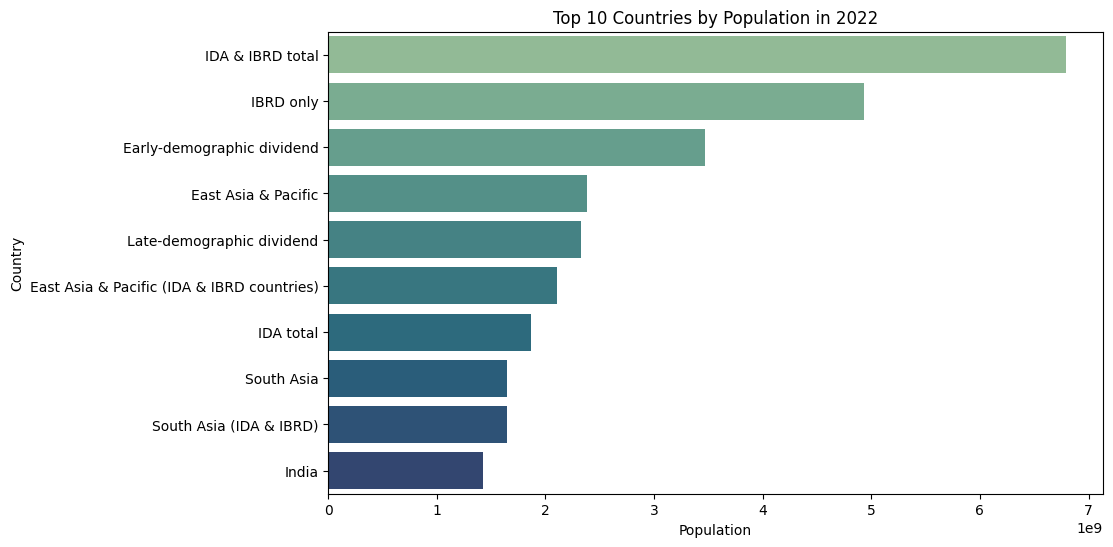

In [ ]:
df_2022 = df_clean[['Country Name', '2022']]
df_2022.columns = ['Country', 'Population']
top10 = df_2022.sort_values(by='Population', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Population', y='Country', palette='crest', hue='Country', legend=False)
plt.title('Top 10 Countries by Population in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

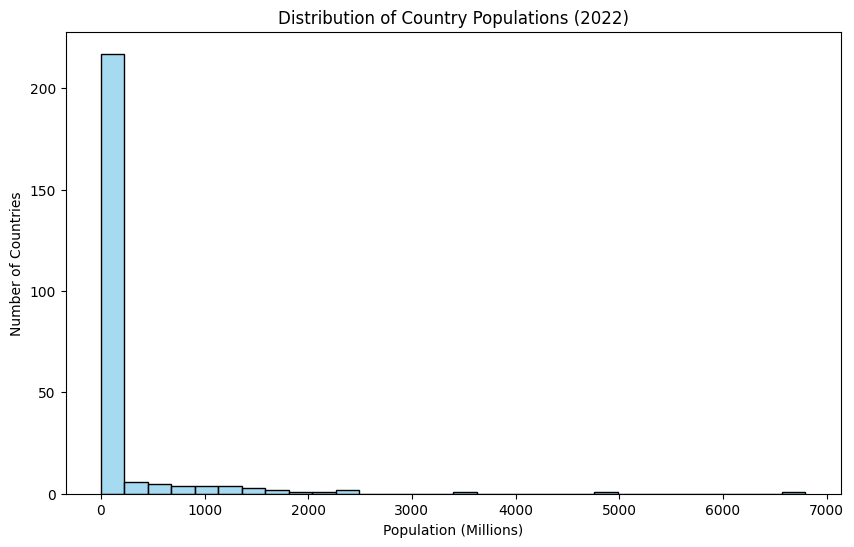

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_2022['Population']/1e6, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Country Populations (2022)')
plt.xlabel('Population (Millions)')
plt.ylabel('Number of Countries')
plt.show()

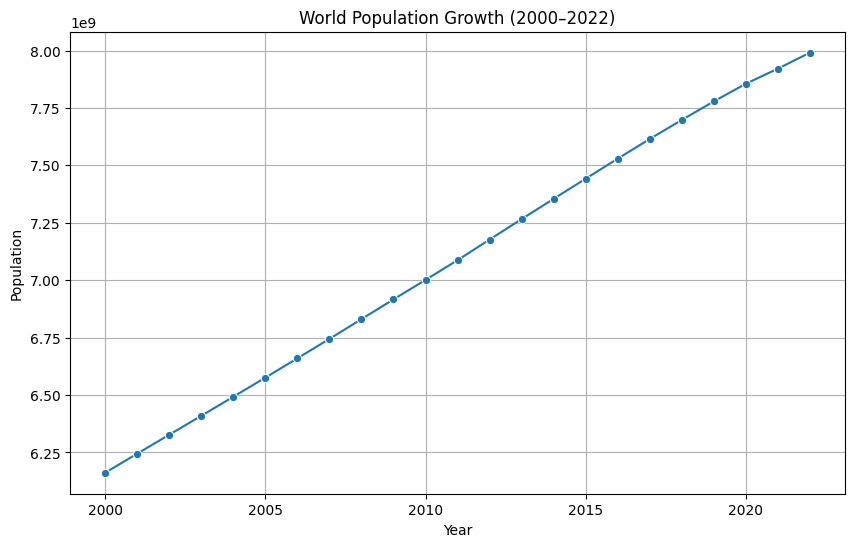

In [ ]:
df_world = df[df['Country Name'] == 'World']
world_pop = df_world[years].T
world_pop.columns = ['World Population']
world_pop.index.name = 'Year'
world_pop.reset_index(inplace=True)
world_pop['Year'] = world_pop['Year'].astype(int)

plt.figure(figsize=(10,6))
sns.lineplot(data=world_pop, x='Year', y='World Population', marker='o')
plt.title('World Population Growth (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()